# Homework Problem \#3 - Finding an exoplanet

**Hand-in format:** IPython Notebook or python program. Submit via email.

As a reminder: please make sure your code is clean, documentated, and understandable. Make sure it runs without errors.

## Background

In this problem set, we will analyze a dataset that contains the [radial velocity](https://en.wikipedia.org/wiki/Radial_velocity) of a star versus time. The radial velocity is the velocity with which the star is moving towards or away from us (positive velocities indicate it is moving away from us).

If a star is not close to any other objects, there is no reason why the radial velocity should change over time. However, in the case where a second object is orbiting a star (such as a planet or another star), the star and the object will both orbit the center of mass of the system. Therefore, the star will show periodic variations in its velocity over time. 

These changes in velocity then cause a shift in spectral lines via the [Doppler effect](https://en.wikipedia.org/wiki/Doppler_effect), which we can measure with specographs on telescopes.

> The smaller the second object, the less the star will be affected. For example, the Earth causes the Sun to change its velocity with an amplitude of 0.1 m/s over 1 year.

Watch the following video to see an example of a large planet orbiting a star, and the effect on the observed spectral lines of the sta:

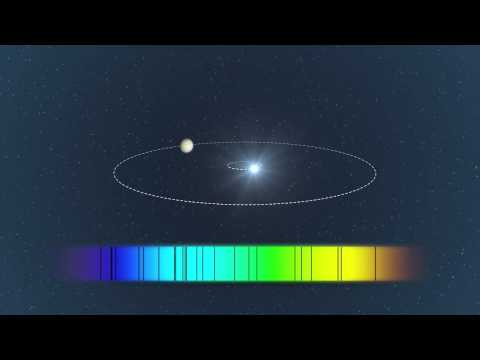

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("-BuwWtMygxU")

Looking for small changes for the radial velocities of stars is one method to find planets outside our own Solar System ("exoplanets").

> The other common technique is the [transit method](https://de.wikipedia.org/wiki/Transitmethode), which we will not consider.

## Our goal

In this problem set, we want to find out whether a particular star has a companion object, and if so, we want to estimate the probability that the companion object is a planet.

The data file required for this exercise is [data/p3_rv.txt](data/p3_rv.txt), a CSV file (whitespace separated) with three columns (and three header lines prefixed by `#`):

* column 1: time [days]
* column 2: radial velocity [m/s]
* column 3: radial velocity uncertainty [m/s]

## Part 1 - Visualizing the data

To start we want to see whether the star does indeed show periodic variations, and if so, we want to measure the period and amplitude.

Read in the data and make a plot of the radial velocity in the file. Include axis labels, units, and error bars.

Is the time spacing in the data equal? Do you see any clear periodic variations "by eye"?

In [1]:
# your solution here


## Part 2 - The periodogram

To automatically determine the period of a time series, we can use a [periodogram algorithm](https://en.wikipedia.org/wiki/Periodogram). Adopt the following method:

1. take an input `period`

2. compute the phase of the radial velocity curve: `phase = (time % period) / period`

3. sort both the phase and velocity data, by the phase.

4. find the "string length" $L$ of a line that would join all the sorted points, from left to right. If $\phi$ is the sorted phase, $v$ is the velocity, and $N$ is the number of points, then

  $$L = \sum_i^{N-1}{\sqrt{(\phi_{i+1} - \phi_{i})^2 + (v_{i+1} - v_{i})^2}}$$

---

Implement this algorithm, and find the string length for 10,000 periods logarithmically spaced between 1 and 100 days.

Make a log-log plot of string length versus period. What do you see? (There should be several clear minima).

In [2]:
# your solution here


## Part 3 - Finding the best-fit period

Using the above calculations, find the best-fit period of the first clear minimum (optional question: why the first? what do the other minima correspond to?).

Then, plot radial velocity (with error bars) versus phase for the best-fit period you derived.

> If you have a good best-fit value, you should see something that looks similar to one period of a sinusoidal function.
>
> This means that there are indeed periodic (in fact. sinusoidal) variations in the radial velocity curve, indicating that a second object is likely orbiting the star!


In [3]:
# your solution here


## Part 4 - Fitting the radial velocity amplitude

Fit the radial velocity versus phase (using your best-fit period), with the functional form: $f(x) = a \sin{(2\pi x + b)}$ where $a$ is the amplitude, and $b$ is a phase shift.

> Make sure $a$ is positive.

Plot the radial velocity data, with error bars, and overplot the best-fit function.

Then, derive the uncertainty on $a$, using the covariance matrix returned by the fitting function.

In [5]:
# your solution here


## Part 5

We will now estimate the mass of the planet that is orbiting the star.

Given that the radial velocity curve is roughly sinusoidal, this suggests the planet is on a roughly circular orbit.

For two bodies (in our case a star and a planet) orbiting a common center of mass in circular orbits, Kepler's 3rd law of motion states that:

$$\frac{4\pi^2}{T^2} = \frac{G M_\star (1 + q)}{R^3}$$

where $T$ is the orbital period, $M_\star$ is the mass of the star, $q$ is the ratio of the object mass to the mass of the star, and $R$ is the distance between the object and the star.

In addition, for two objects orbiting a common center of mass, the amplitudes of the velocities $K$ will be related to the mass of the two objects - with the more massive one moving less:

$$\frac{K_\rm{star}}{K_{\rm planet}} = q$$

Finally, for a circular orbit:

$$K_{\rm planet} T = 2\pi R$$

Substituting this back into Kepler's law and simplifying gives:

$$(1 + q)~q^3 = \frac{T K_{\rm star}^3}{2\pi G M_\star}$$

Finally, there is one final important thing to consider, which is that the velocity amplitude we measure for the star is not $K_{\rm star}$ but

$$K_{\rm obs,star} = K_{\rm star}~\sin{i}$$

where $i$ is the viewing angle of the system ($i=90^\circ$ means that we are observing the system *edge-on*, and $i=0^\circ$ corresponds to a *face-on* orientation where we would not see the star move towards or away from us). $K_{\rm obs,star}$ is the amplitude of the velocity - the ``a`` parameter you measured above.

Therefore, assuming $q << 1$, the final equation is:

$$q \approx \left(\frac{T}{2\pi G M_\star}\right)^{1/3} \frac{K_{\rm obs,star}}{\sin{i}}$$

---

Compute the value of $q$ assuming the values of $T$ and $K_{\rm obs,star}$ you found above, and adopting $\sin{i}=1$. Further, assume that $M_\star$ is the mass of the Sun ($M_\star=1.989\times 10^{30} \,\rm{kg}$).

Using $q$, derive the mass of the object in units of the mass of Jupiter ($M_{\rm Jupiter}=1.898\times 10^{27} \,\rm{kg}$). Is the object likely to be a planet?

In [6]:
# your solution here


## Part 6 - Quantifying the uncertainty on the planet mass

In reality, your derived $K_{\rm obs,star}$ value has uncertainties, as does the mass of the star, and the viewing angle.

Carry out a Monte-Carlo error propagation simulation, to find the likely distribution of masses for the object assuming that:

* the error on the radial velocity is the one you derived above, and is normal (i.e. represents a Gaussian)

* the mass of the star is sampled from a uniform distribution, between 0.6 and 1.4 times the mass of the Sun.

* the viewing angle can be anywhere between 0 and 90 degrees. However, one cannot simply sample $i$ randomly between 0 and 90 because some viewing angles are more likely than others - to do it properly you need to sample $\cos{i}$ uniformly between 0 and 1, then derive $i$ and so $\sin{i}$ from this.

From the Monte-Carlo simulation, plot a histogram of the probability that the object has a certain mass, and show only the range from 0 to 13 times the mass of Jupiter.

What is the (numerical) probability that the object is less massive than 13 times the mass of Jupiter?
> This is usually considered to be the upper limit for the mass of a planet.

What degree of confidence do we have that the object is a planet, for 1, 3, and 5 sigma [confidence bounds](https://en.wikipedia.org/wiki/68%E2%80%9395%E2%80%9399.7_rule)?1/2/3/4/5-sigma confidence terminology?

Based on this, what can you conclude about the object?

In [7]:
# your solution here
